# Churn Prediction (Telco-Customer)

Churn is a one of the biggest problem in the telecom industry.

In [1]:
#import library
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import matplotlib.ticker as mtick

In [2]:
#Dataframe
data = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [3]:
#Check the data
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [6]:
data.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [7]:
#Convert data to numeric
data.TotalCharges = pd.to_numeric(data.TotalCharges, errors='coerce')

In [8]:
#Check null columns after conversion
data.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [9]:
data.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7032.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2266.771362
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


In [10]:
#Drop the null rows because only 11 rows are null
data.dropna(inplace=True)

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 


In [12]:
#Drop the customerID column because its not important
df2 = data.drop('customerID', axis=1)

In [13]:
df2.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [14]:
#Replace value from object to numeric
df2['Churn'].replace(to_replace='Yes', value=1, inplace=True)
df2['Churn'].replace(to_replace='No', value=0, inplace=True)

In [15]:
df_dummies = pd.get_dummies(df2)
df_dummies.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,0,1,0,0,1,1,...,0,1,0,0,0,1,0,0,1,0
1,0,34,56.95,1889.50,0,0,1,1,0,1,...,0,0,1,0,1,0,0,0,0,1
2,0,2,53.85,108.15,1,0,1,1,0,1,...,0,1,0,0,0,1,0,0,0,1
3,0,45,42.30,1840.75,0,0,1,1,0,1,...,0,0,1,0,1,0,1,0,0,0
4,0,2,70.70,151.65,1,1,0,1,0,1,...,0,1,0,0,0,1,0,0,1,0


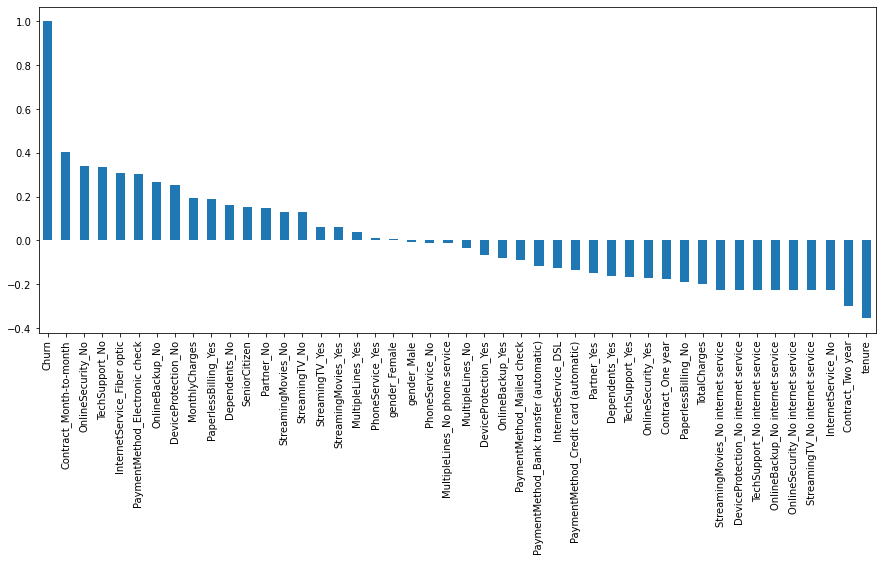

In [16]:
#Check the correlation with the churn column
plt.figure(figsize=(15,6))
df_dummies.corr()['Churn'].sort_values(ascending=False).plot(kind='bar')

Some columns have strong correlation with Churn column. Month to month contract, absence of online security and tech support seem to be positively correlated with churn. While, tenure, two year contracts seem to be negatively correlated with churn.

Interestingly, services such as Online Security, Streaming TV, online backup, and tech support without internet connection seem to be negatively related to churn.

We willl explore the patterns later.

## 1. Check the Churn Distribution 

The Churn data is dominated by around 70% 'No' label  

Text(0.5, 0, 'Churn')

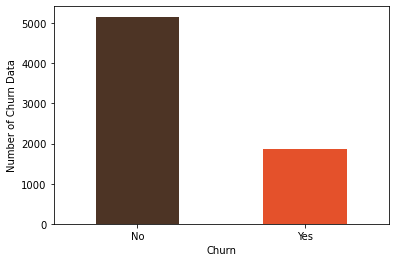

In [17]:
colors = ['#4D3425', '#E4512B']
ax = data['Churn'].value_counts().plot(kind='bar', rot=0, color=colors)
ax.set_ylabel('Number of Churn Data')
ax.set_xlabel('Churn')

## 2. Demographics

 **a. Gender Distribution** - About half of the customers in the dataset are male while the other half are female

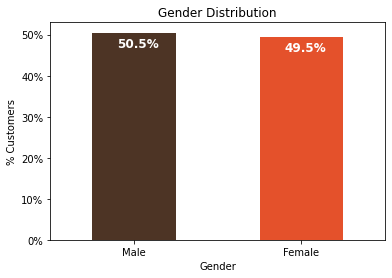

In [18]:
colors = ['#4D3425', '#E4512B']
ax = (data['gender'].value_counts()*100.0/len(data)).plot(kind='bar',
                                                        stacked=True,
                                                        rot=0,
                                                        color=colors)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('% Customers')
ax.set_xlabel('Gender')
ax.set_title('Gender Distribution')

totals = [i.get_width() for i in ax.patches]

total=sum(totals)

for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_x()+.15, i.get_height()-3.5, \
            str(round((i.get_height()/total), 1))+'%',
            fontsize=12,
            color='white',
           weight = 'bold')

**b. % of Senior Citizens** - There are only 16% of the customers who are senior citizens. Thus most of the customers in the data are young people.

Text(0.5, 1.0, '% of Senior Citizens')

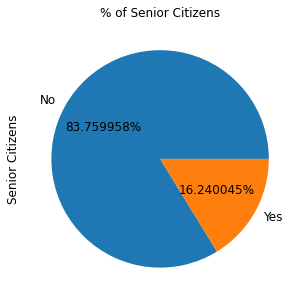

In [19]:
ax = (data['SeniorCitizen'].value_counts()*100.0/len(data))\
.plot.pie(autopct='%1f%%', labels = ['No', 'Yes'], figsize=(5,5), fontsize=12)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('Senior Citizens', fontsize=12)
ax.set_title('% of Senior Citizens', fontsize=12)

In [20]:
data2 = pd.melt(data, id_vars=['customerID'], value_vars=['Dependents', 'Partner'])
data2                

,customerID,variable,value
0,7590-VHVEG,Dependents,No
1,5575-GNVDE,Dependents,No
2,3668-QPYBK,Dependents,No
3,7795-CFOCW,Dependents,No
4,9237-HQITU,Dependents,No
...,...,...,...
14059,6840-RESVB,Partner,Yes
14060,2234-XADUH,Partner,Yes
14061,4801-JZAZL,Partner,Yes
14062,8361-LTMKD,Partner,Yes


In [21]:
data3=data2.groupby(['variable', 'value']).count().unstack()
df=data3*100/len(data)
df.loc[:,'customerID']

value,No,Yes
variable,,
Dependents,70.150739,29.849261
Partner,51.749147,48.250853


**c. Partner and dependent status** - About 50% of customers have a partner, while only 30% of the total customers have dependents

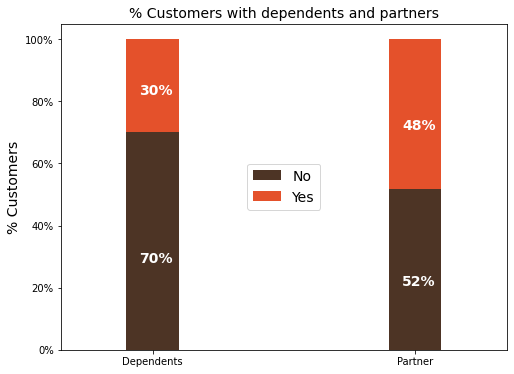

In [22]:
pnd_data = pd.melt(data, id_vars=['customerID'], value_vars=['Dependents','Partner'])
df3 = pnd_data.groupby(['variable','value']).count().unstack()
df3 = df3*100/len(data)
colors = ['#4D3425','#E4512B']
ax = df3.loc[:,'customerID'].plot.bar(stacked=True, color=colors,
                                      figsize=(8,6),rot = 0,
                                     width = 0.2)

ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('% Customers',size = 14)
ax.set_xlabel('')
ax.set_title('% Customers with dependents and partners',size = 14)
ax.legend(loc = 'center',prop={'size':14})

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.0f}%'.format(height), (p.get_x()+.25*width, p.get_y()+.4*height),
                color = 'white',
               weight = 'bold',
               size = 14)

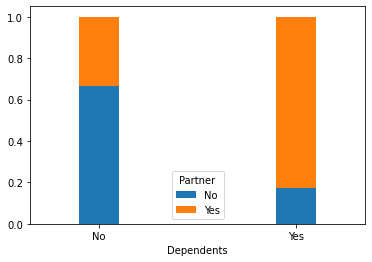

In [23]:
ax=data.groupby('Dependents')['Partner'].value_counts(normalize=True).unstack('Partner').plot.bar(stacked=True,width=0.2, rot=0)

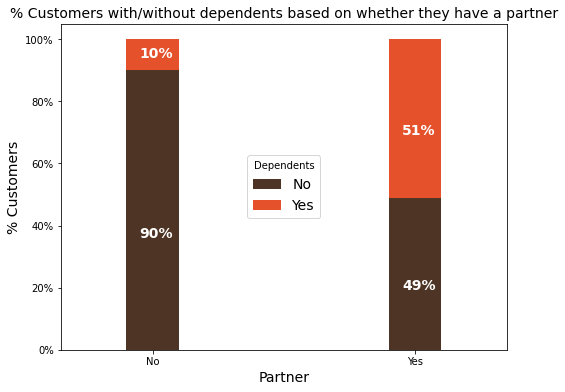

In [24]:
colors = ['#4D3425','#E4512B']
partner_dependents = data.groupby(['Partner','Dependents']).size().unstack()

ax = (partner_dependents.T*100.0 / partner_dependents.T.sum()).T.plot(kind='bar',
                                                                width = 0.2,
                                                                stacked = True,
                                                                rot = 0, 
                                                                figsize = (8,6),
                                                                color = colors)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.legend(loc='center',prop={'size':14},title = 'Dependents',fontsize =14)
ax.set_ylabel('% Customers',size = 14)
ax.set_title('% Customers with/without dependents based on whether they have a partner',size = 14)
ax.xaxis.label.set_size(14)

# Code to add the data labels on the stacked bar chart
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.0f}%'.format(height), (p.get_x()+.25*width, p.get_y()+.4*height),
                color = 'white',
               weight = 'bold',
               size = 14)

## 3. Customer Account Information

**a. Tenure** - From the histogram below, we know that the tenure of the customers varies from 0-72 months. A lot of customers have been with the telecom company for just a month, while quite a many are there for about 72 months. This tenure may affect the churn of the customers.

C:\Users\kana\Anaconda3\envs\tensorflow_env\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, '# of Customers by Tenure')

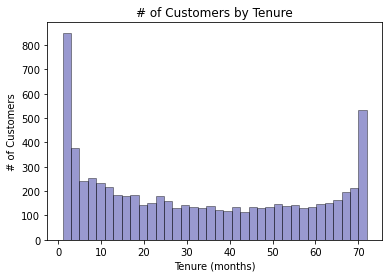

In [25]:
ax = sns.distplot(data['tenure'],kde=False,bins=36,color='darkblue',hist_kws={'edgecolor':'black'})
ax.set_ylabel('# of Customers')
ax.set_xlabel('Tenure (months)')
ax.set_title('# of Customers by Tenure')

**b. Cotracts** - The most of the customers are in month to month contract. While there are almost equal number of customers in 1 year and 2 year contracts.

Text(0.5, 1.0, '# of Customers by Contract Type')

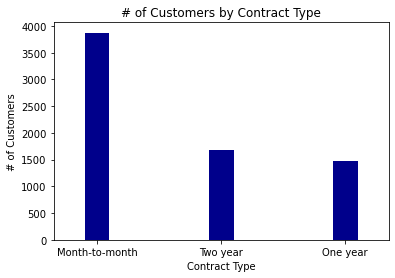

In [26]:
ax = data['Contract'].value_counts().plot(kind='bar', width=0.2, rot=0, color='darkblue')
ax.set_ylabel('# of Customers')
ax.set_xlabel('Contract Type')
ax.set_title('# of Customers by Contract Type')

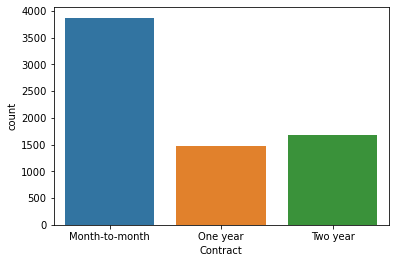

In [27]:
ax = sns.countplot(x="Contract", data=data)

Most of the monthly contracts last for 1-2 months, while the 2 year contract tends to last dor about 70 months or more. The customers taking a longer contract are more loyal.

C:\Users\kana\Anaconda3\envs\tensorflow_env\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Two Year Controcat')

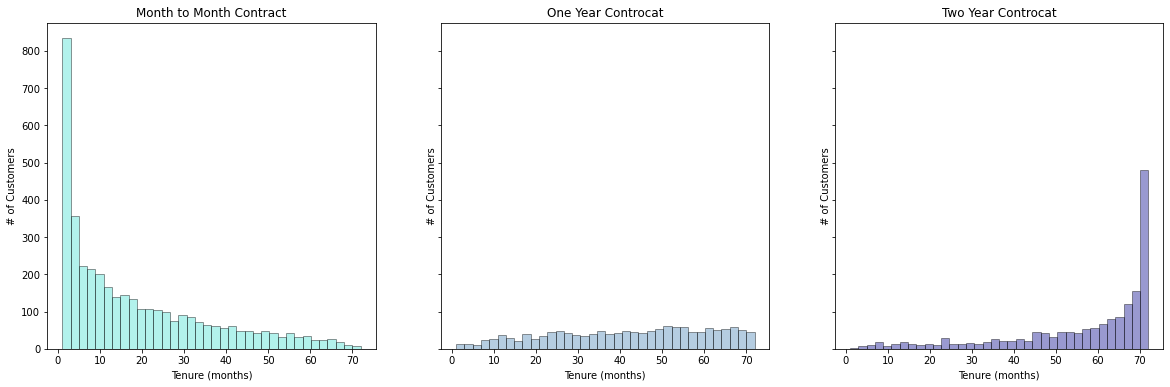

In [28]:
fig, (ax1,ax2,ax3) = plt.subplots(nrows=1, ncols=3, sharey = True, figsize = (20,6))

ax = sns.distplot(data[data['Contract']=='Month-to-month']['tenure'],kde=False,bins=36,color='turquoise',hist_kws={'edgecolor':'black'}, ax=ax1)
ax.set_ylabel('# of Customers')
ax.set_xlabel('Tenure (months)')
ax.set_title('Month to Month Contract')

ax = sns.distplot(data[data['Contract']=='One year']['tenure'],kde=False,bins=36,color='steelblue',hist_kws={'edgecolor':'black'}, ax=ax2)
ax.set_ylabel('# of Customers')
ax.set_xlabel('Tenure (months)')
ax.set_title('One Year Controcat')

ax = sns.distplot(data[data['Contract']=='Two year']['tenure'],kde=False,bins=36,color='darkblue',hist_kws={'edgecolor':'black'}, ax=ax3)
ax.set_ylabel('# of Customers')
ax.set_xlabel('Tenure (months)')
ax.set_title('Two Year Controcat')

In [29]:
data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

## 4. Distribution of Various Service

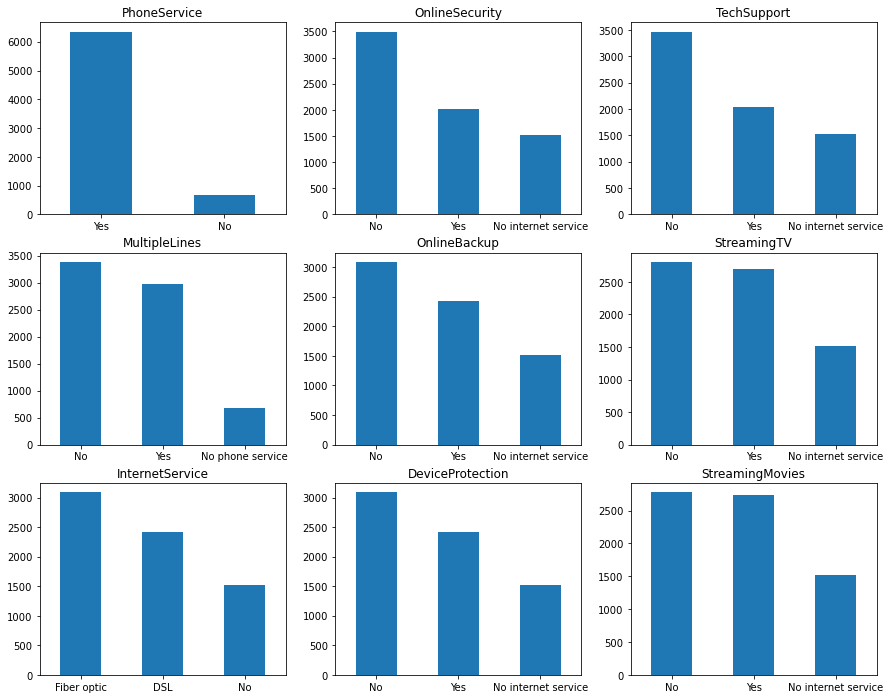

In [30]:
services = ['PhoneService','MultipleLines','InternetService','OnlineSecurity',
           'OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies']

fig, axes = plt.subplots(nrows = 3,ncols = 3,figsize = (15,12))
for i, item in enumerate(services):
    if i < 3:
        ax = data[item].value_counts().plot(kind = 'bar',ax=axes[i,0],rot = 0)
        
    elif i >=3 and i < 6:
        ax = data[item].value_counts().plot(kind = 'bar',ax=axes[i-3,1],rot = 0)
        
    else:
        ax = data[item].value_counts().plot(kind = 'bar',ax=axes[i-6,2],rot = 0)
    ax.set_title(item)

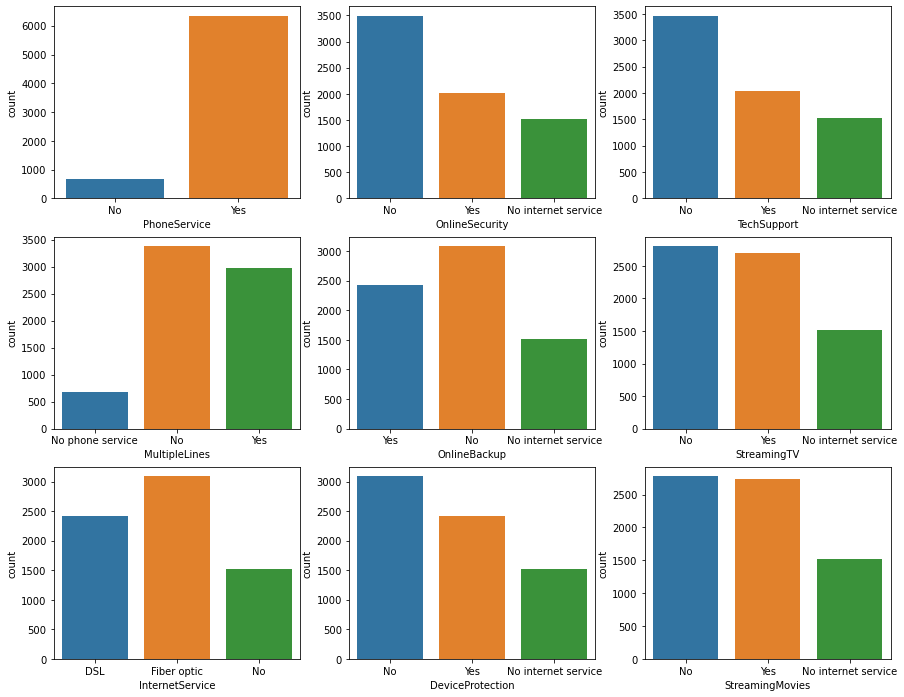

In [31]:
services = ['PhoneService','MultipleLines','InternetService','OnlineSecurity',
           'OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies']

fig, axes = plt.subplots(nrows = 3,ncols = 3,figsize = (15,12))
for i, item in enumerate(services):
    if i < 3:
        ax = sns.countplot(x=item, data=data, ax=axes[i,0])
        
    elif i >=3 and i < 6:
        ax = sns.countplot(x=item, data=data, ax=axes[i-3,1])
        
    else:
        ax = sns.countplot(x=item, data=data, ax=axes[i-6,2])
  

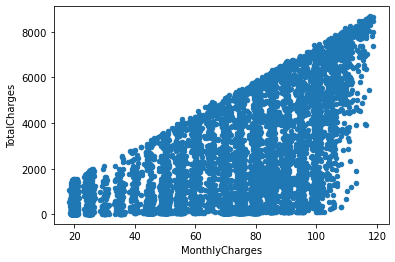

In [32]:
data[['MonthlyCharges', 'TotalCharges']].plot.scatter(x='MonthlyCharges', y='TotalCharges')

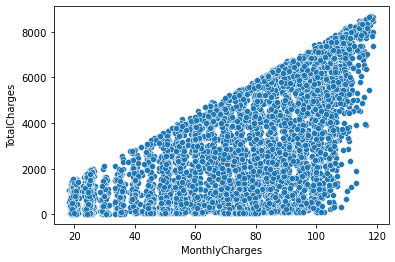

In [33]:
sns.scatterplot(x="MonthlyCharges", y="TotalCharges", data=data)

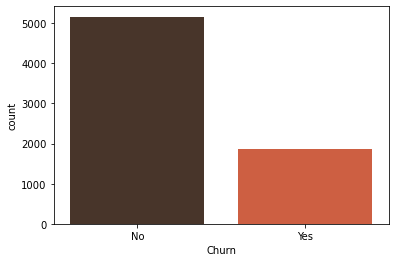

In [34]:
colors = ['#4D3425','#E4512B']
ax = sns.countplot(x='Churn', data=data, palette=colors)


Text(0.5, 1.0, 'Churn Rate')

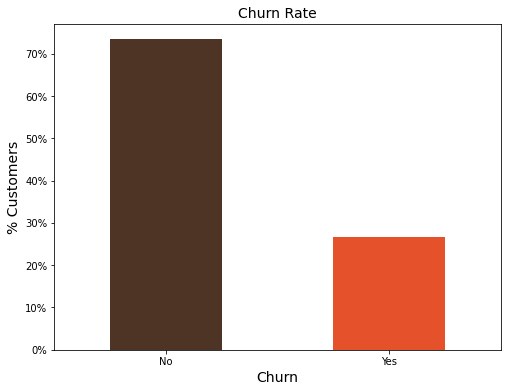

In [35]:
colors = ['#4D3425','#E4512B']
ax = (data['Churn'].value_counts()*100.0 /len(data)).plot(kind='bar',
                                                          stacked = True,
                                                          rot = 0,
                                                          color = colors,
                                                          figsize = (8,6))
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('% Customers',size = 14)
ax.set_xlabel('Churn',size = 14)
ax.set_title('Churn Rate', size = 14)

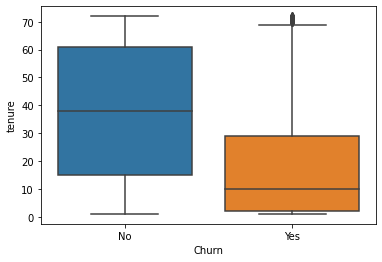

In [36]:
sns.boxplot(x = data.Churn, y= data.tenure)

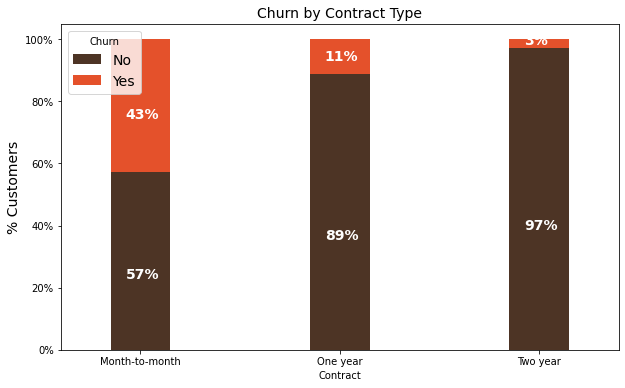

In [37]:
colors = ['#4D3425','#E4512B']
contact_churn = data.groupby(['Contract', 'Churn']).size().unstack()

ax = (contact_churn.T*100.0/contact_churn.T.sum()).T.plot(kind='bar', width=0.3, stacked=True, rot=0, color=colors, figsize= (10,6))

ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.legend(loc='best',prop={'size':14},title = 'Churn')
ax.set_ylabel('% Customers',size = 14)
ax.set_title('Churn by Contract Type',size = 14)

# Code to add the data labels on the stacked bar chart
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.0f}%'.format(height), (p.get_x()+.25*width, p.get_y()+.4*height),
                color = 'white',
               weight = 'bold',
               size = 14)

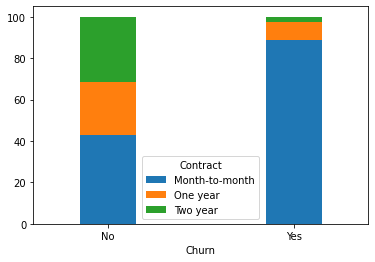

In [38]:
ax = (contact_churn*100.0/contact_churn.sum()).T.plot(kind='bar', width=0.3, stacked=True, rot=0)

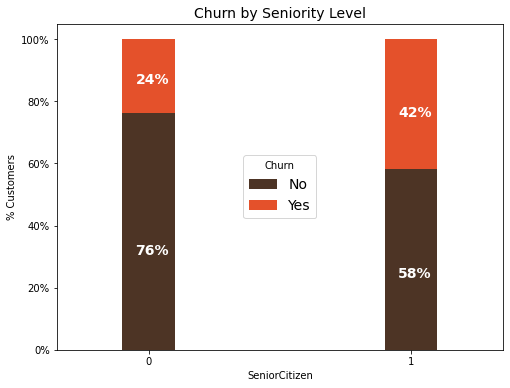

In [39]:
colors = ['#4D3425','#E4512B']
seniority_churn = data.groupby(['SeniorCitizen','Churn']).size().unstack()

ax = (seniority_churn.T*100.0 / seniority_churn.T.sum()).T.plot(kind='bar',
                                                                width = 0.2,
                                                                stacked = True,
                                                                rot = 0, 
                                                                figsize = (8,6),
                                                                color = colors)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.legend(loc='center',prop={'size':14},title = 'Churn')
ax.set_ylabel('% Customers')
ax.set_title('Churn by Seniority Level',size = 14)

# Code to add the data labels on the stacked bar chart
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.0f}%'.format(height), (p.get_x()+.25*width, p.get_y()+.4*height),
                color = 'white',
               weight = 'bold',size =14)

Text(0.5, 1.0, 'Distribution of monthly charges by churn')

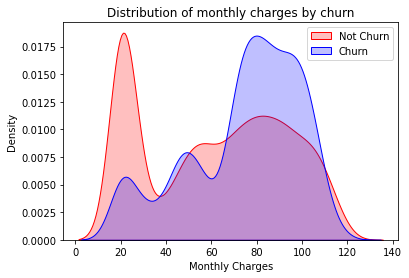

In [40]:
ax = sns.kdeplot(data.MonthlyCharges[(data["Churn"] == 'No') ],
                color="Red", shade = True)
ax = sns.kdeplot(data.MonthlyCharges[(data["Churn"] == 'Yes') ],
                ax =ax, color="Blue", shade= True)
ax.legend(["Not Churn","Churn"],loc='upper right')
ax.set_ylabel('Density')
ax.set_xlabel('Monthly Charges')
ax.set_title('Distribution of monthly charges by churn')

Text(0.5, 1.0, 'Distribution of total charges by churn')

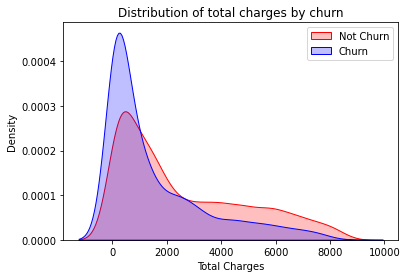

In [41]:
ax = sns.kdeplot(data.TotalCharges[(data["Churn"] == 'No') ],
                color="Red", shade = True)
ax = sns.kdeplot(data.TotalCharges[(data["Churn"] == 'Yes') ],
                ax =ax, color="Blue", shade= True)
ax.legend(["Not Churn","Churn"],loc='upper right')
ax.set_ylabel('Density')
ax.set_xlabel('Total Charges')
ax.set_title('Distribution of total charges by churn')

In [43]:
dfcheck = df2.copy()
for colname in dfcheck.select_dtypes("object"):
    dfcheck[colname], _ = dfcheck[colname].factorize()

In [44]:
dfcheck

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,29.85,29.85,0
1,1,0,1,0,34,1,1,0,1,1,1,0,0,0,1,1,1,56.95,1889.50,0
2,1,0,1,0,2,1,1,0,1,0,0,0,0,0,0,0,1,53.85,108.15,1
3,1,0,1,0,45,0,0,0,1,1,1,1,0,0,1,1,2,42.30,1840.75,0
4,0,0,1,0,2,1,1,1,0,1,0,0,0,0,0,0,0,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,0,1,24,1,2,0,1,1,1,1,1,1,1,0,1,84.80,1990.50,0
7039,0,0,0,1,72,1,2,1,0,0,1,0,1,1,1,0,3,103.20,7362.90,0
7040,0,0,0,1,11,0,0,0,1,1,0,0,0,0,0,0,0,29.60,346.45,0
7041,1,1,0,0,4,1,2,1,0,1,0,0,0,0,0,0,1,74.40,306.60,1


In [45]:
dfcheck_target = dfcheck.pop('Churn')
dfcheck_target

0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: Churn, Length: 7032, dtype: int64

In [46]:
from sklearn.feature_selection import mutual_info_regression
discrete_features = dfcheck.dtypes == int

def make_mi_scores(X, y, discrete_features):
    mi_scores = mutual_info_regression(X, y, discrete_features=discrete_features)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

mi_scores = make_mi_scores(dfcheck, dfcheck_target, discrete_features)
mi_scores[::3]  # show a few features with their MI scores

Contract         0.094798
TechSupport      0.065477
OnlineBackup     0.049210
TotalCharges     0.043764
SeniorCitizen    0.027592
PhoneService     0.007763
gender           0.000000
Name: MI Scores, dtype: float64

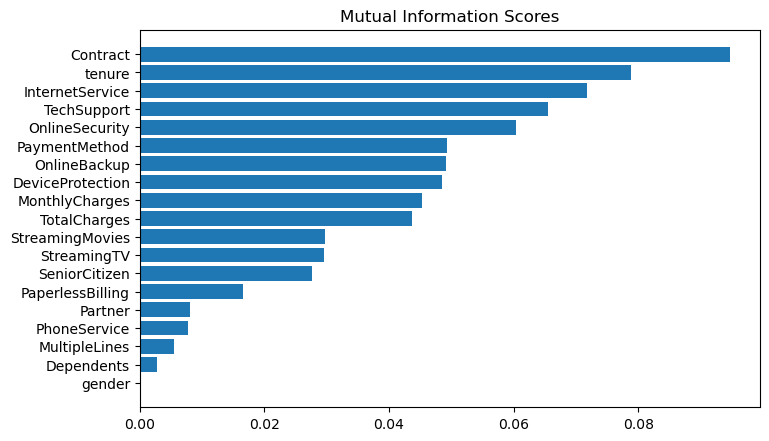

In [47]:
def plot_mi_scores(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title("Mutual Information Scores")


plt.figure(dpi=100, figsize=(8, 5))
plot_mi_scores(mi_scores)

## Make ML Model

In [65]:
df_dummies = pd.get_dummies(df2)
y = df_dummies['Churn'].values
X = df_dummies.drop(columns=['Churn'])

In [66]:
from sklearn.preprocessing import MinMaxScaler
features = X.columns.values
scaler = MinMaxScaler(feature_range=(0,1))
scaler.fit(X)
X= pd.DataFrame(scaler.transform(X))
X.columns = features

In [67]:
# Create Train & Test Data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=150)

In [51]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
result = model.fit(X_train, y_train)

In [52]:
from sklearn import metrics
prediction_test = model.predict(X_test)
print(metrics.accuracy_score(y_test, prediction_test))

0.8023696682464455


AxesSubplot(0.125,0.125;0.775x0.755)


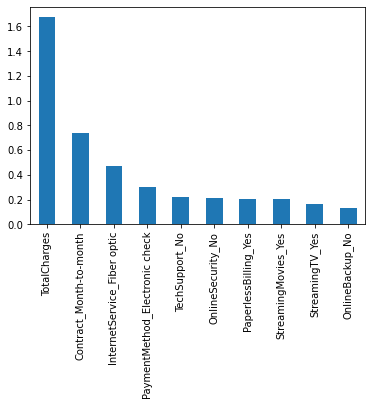

In [53]:
weights = pd.Series(model.coef_[0], index=X.columns.values)
print(weights.sort_values(ascending=False)[:10].plot(kind='bar'))

AxesSubplot(0.125,0.125;0.775x0.755)


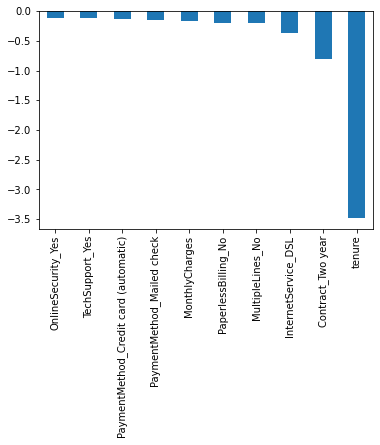

In [54]:
print(weights.sort_values(ascending = False)[-10:].plot(kind='bar'))

In [55]:
from sklearn.ensemble import RandomForestClassifier
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
model_rf = RandomForestClassifier(n_estimators=100, oob_score=True, n_jobs=-1, random_state=50, max_features="auto", max_leaf_nodes=30)
model_rf.fit(X_train, y_train)
prediction_rf = model_rf.predict(X_test)
print(metrics.accuracy_score(y_test, prediction_test))

0.6270142180094787


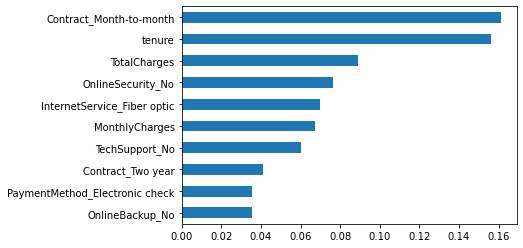

In [56]:
importances = model_rf.feature_importances_
weights = pd.Series(importances, index=X.columns.values)
weights.sort_values()[-10:].plot(kind = 'barh')

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=99)

In [58]:
from sklearn.svm import SVC

model.svm = SVC(kernel='linear') 
model.svm.fit(X_train,y_train)
preds = model.svm.predict(X_test)
metrics.accuracy_score(y_test, preds)

0.820184790334044

In [59]:
# Create the Confusion matrix
from sklearn.metrics import classification_report, confusion_matrix  
print(confusion_matrix(y_test,preds))

[[953  89]
 [164 201]]


In [60]:
# AdaBoost Algorithm
from sklearn.ensemble import AdaBoostClassifier
model = AdaBoostClassifier()
# n_estimators = 50 (default value) 
# base_estimator = DecisionTreeClassifier (default value)
model.fit(X_train,y_train)
preds = model.predict(X_test)
metrics.accuracy_score(y_test, preds)

0.8159203980099502

In [61]:
from xgboost import XGBClassifier
model = XGBClassifier()
model.fit(X_train, y_train)
preds = model.predict(X_test)
metrics.accuracy_score(y_test, preds)

0.8095238095238095